<CENTER> <H1> CONVOLUTIONAL NEURAL NETWORKS </H1> </CENTER>

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
# Modified National Institute of Standards and Technology dataset. 
# It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten
# single digits between 0 and 9
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

ImportError: Could not find the DLL(s) 'msvcp140_1.dll'. TensorFlow requires that these DLLs be installed in a directory that is named in your %PATH% environment variable. You may install these DLLs by downloading "Microsoft C++ Redistributable for Visual Studio 2015, 2017 and 2019" for your platform from this URL: https://support.microsoft.com/help/2977003/the-latest-supported-visual-c-downloads

In [1]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.7 MB 825.8 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 1.5 MB/s eta 0:00:02
   --------- ------------------------------ 0.4/1.7 MB 2.4 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 2.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.7 MB 3.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.3/1.7 MB 4.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.5/1.7 MB 4

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/126.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.5 kB ? eta -:--:--
     ----------- ------------------------- 41.0/126.5 kB 495.5 kB/s eta 0:00:01
     ------------------------------------ - 122.9/126.5 kB 1.0 MB/s eta 0:00:01
     ------------------------------------ 126.5/126.5 kB 745.6 kB/s eta 0:00:00
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# Size of image is 28x28x1 channel.
input_shape = (28, 28, 1)
batch_size = 64
# number of possible outcomes [0-9]
nclasses = 10
epochs = 3

In [3]:
# Fetch the train and test data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

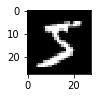

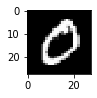

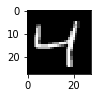

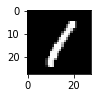

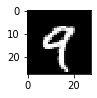

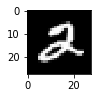

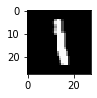

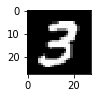

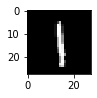

In [8]:
# Plot Dataset 
from matplotlib import pyplot
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [9]:
# Normalize the image so that all pixel values
# are between -0.5 and +0.5.
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

In [10]:
# Reshape the train and test images to size 28x28x1.
x_train = x_train.reshape((x_train.shape[0], *input_shape))
x_test = x_test.reshape((x_test.shape[0], *input_shape))

In [11]:
# Define the CNN model with 2 convolution layer and
# 2 max pooling layer followed by a neural network
# with 1 hidden layer of size 128 nodes.
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))

W1109 05:10:11.778418 11912 deprecation_wrapper.py:119] From C:\Users\ROHINI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1109 05:10:15.548157 11912 deprecation_wrapper.py:119] From C:\Users\ROHINI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 05:10:16.355617 11912 deprecation_wrapper.py:119] From C:\Users\ROHINI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1109 05:10:17.236900 11912 deprecation_wrapper.py:119] From C:\Users\ROHINI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [12]:
# Compile the model using Adam optimizer and use
# the cross entropy loss.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W1109 05:10:19.796515 11912 deprecation_wrapper.py:119] From C:\Users\ROHINI\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1109 05:10:20.073105 11912 deprecation_wrapper.py:119] From C:\Users\ROHINI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [13]:
# Train the model.
model.fit(x_train, to_categorical(y_train), epochs=epochs,
          batch_size=batch_size)

W1109 05:10:23.551844 11912 deprecation.py:323] From C:\Users\ROHINI\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1109 05:10:23.734313 11912 deprecation_wrapper.py:119] From C:\Users\ROHINI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/3
60000/60000 [==============================] - 39s 645us/step - loss: 0.1676 - acc: 0.9502
Epoch 2/3
60000/60000 [==============================] - 31s 523us/step - loss: 0.0469 - acc: 0.9856
Epoch 3/3
60000/60000 [==============================] - 31s 509us/step - loss: 0.0320 - acc: 0.99010s - loss: 0.03


In [14]:
# Evaluate the model.
score = model.evaluate(x_test, to_categorical(y_test), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.032085849371459335
Test accuracy: 0.9895
